In [70]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from matplotlib import rcParams


### We will be generating 100  data points using numpy. It represents a simple straight line with a bit of noise.



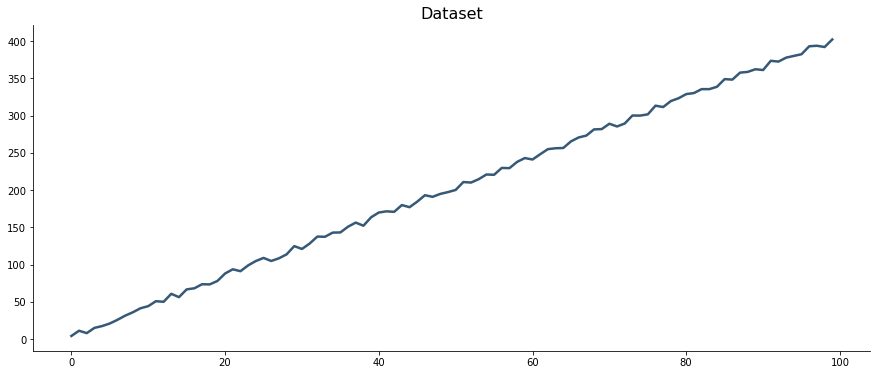

In [71]:
rcParams['figure.figsize'] = 15, 6
rcParams['lines.linewidth'] = 2.5


np.random.seed(1)
X = np.arange(0, 400, 4)

Y = [x + np.random.random() * 10 for x in X]

df = pd.DataFrame(data={
    'x': X,
    'y': Y
})


plt.title('Dataset', size=16)
plt.plot(df['y']);

### In the next step we divide train and test set. 20 points will be used as test set .

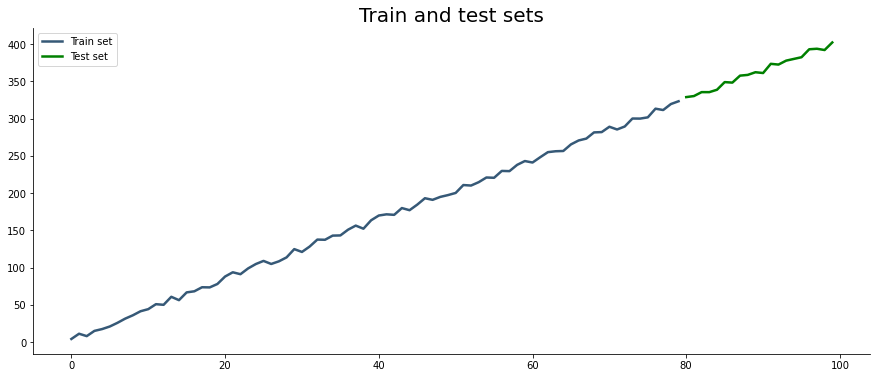

In [72]:
df_train = df[:-20]
df_test = df[-20:]

plt.title('Train and test sets', size=20)
plt.plot(df_train['y'], label='Train set')
plt.plot(df_test['y'], color='green', label='Test set')
plt.legend();

### Training and prediction


In [73]:
def train_AR_model(maxlag):
    model = AutoReg(df_train['y'], lags=maxlag).fit()

    prediction = model.predict(
        start=len(df_train),
        end=len(df_train) + len(df_test) - 1,
    )
    

    
    plt.title(f'AR({maxlag}) train | test and forecast plot', size=20, y=1.1)
    plt.plot(df_train['y'], label='Training data')
    plt.plot(df_test['y'], color='gray', label='Testing data')
    plt.plot(prediction, color='orange', label='Forecasts')
    plt.legend();
    return model

### Plot of prediction for lag 1


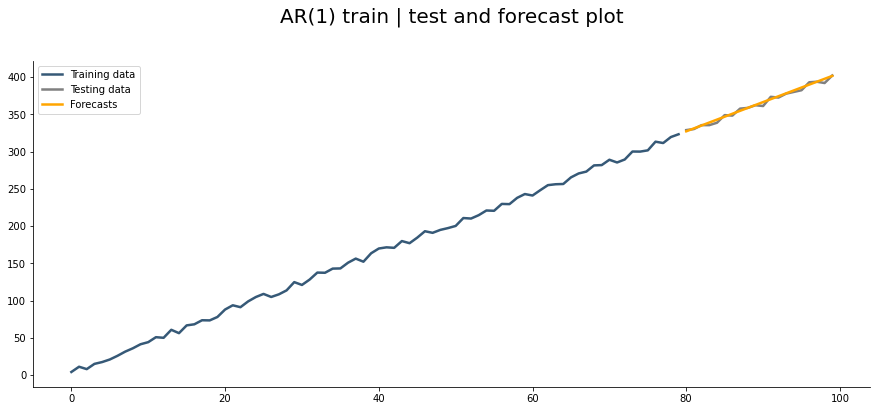

In [86]:
model = train_AR_model(maxlag=1)

In [75]:
parameters = model.params.to_dict()
parameters

{'const': 4.138288656283755, 'y.L1': 0.9993825697195424}

### Plot of prediction for lag 2


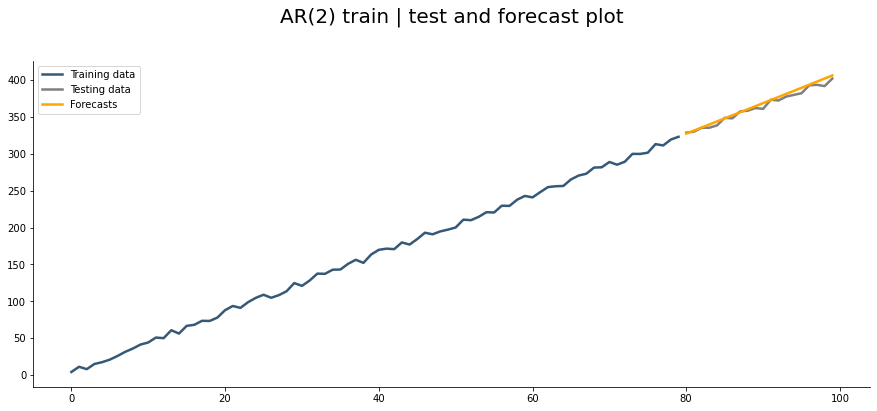

In [77]:
model = train_AR_model(maxlag=2)

In [78]:
parameters = model.params.to_dict()
parameters

{'const': 5.9548222194517235,
 'y.L1': 0.47591292481299363,
 'y.L2': 0.5251254628323558}

### Plot of prediction for lag 3


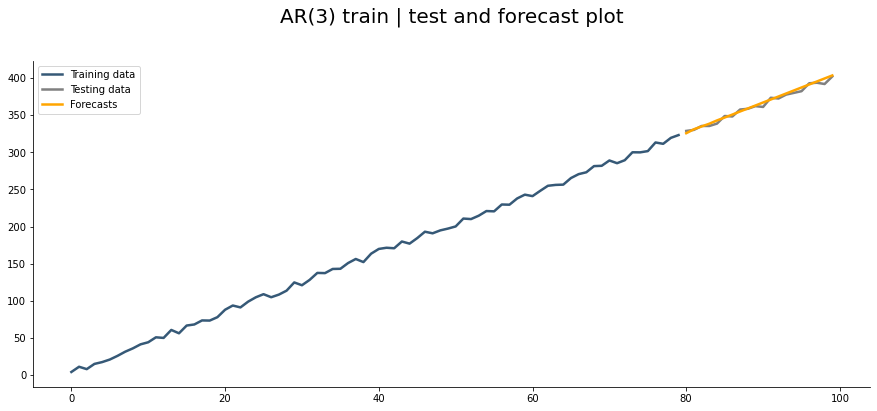

In [84]:
model = train_AR_model(maxlag=3)

In [85]:
parameters = model.params.to_dict()
parameters

{'const': 8.823642873965358,
 'y.L1': 0.25551654238360655,
 'y.L2': 0.30491119346055395,
 'y.L3': 0.43960958481507584}

`y.L1`,`y.L2` and `y.L3` are lag1, lag2 and lag3 coefficients respectively.